In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading data
# read the dataset
data = pd.read_excel('owid-covid-data.xlsx')
## Displaying the dataset header
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
1# Selecting columns
## Displaying general information about columns
data.info()
## Choosing columns for analysis
filtered_data = data.loc[:, ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'stringency_index', 'population']].dropna().reset_index(drop=True)
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79667 entries, 0 to 79666
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79667 non-null  object 
 1   continent                              75781 non-null  object 
 2   location                               79667 non-null  object 
 3   date                                   79667 non-null  object 
 4   total_cases                            78097 non-null  float64
 5   new_cases                              78095 non-null  float64
 6   new_cases_smoothed                     77094 non-null  float64
 7   total_deaths                           68648 non-null  float64
 8   new_deaths                             68806 non-null  float64
 9   new_deaths_smoothed                    77094 non-null  float64
 10  total_cases_per_million                77673 non-null  float64
 11  ne

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population
0,AFG,Asia,Afghanistan,2020-03-22,34.0,4.0,1.0,1.0,41.67,38928341.0
1,AFG,Asia,Afghanistan,2020-03-23,41.0,7.0,1.0,0.0,41.67,38928341.0
2,AFG,Asia,Afghanistan,2020-03-24,43.0,2.0,1.0,0.0,50.93,38928341.0
3,AFG,Asia,Afghanistan,2020-03-25,76.0,33.0,2.0,1.0,59.26,38928341.0
4,AFG,Asia,Afghanistan,2020-03-26,80.0,4.0,3.0,1.0,59.26,38928341.0


In [ ]:
# Filtering the data
## Displaying continent categories
print(filtered_data['continent'].value_counts())
## Applying various filters
data_filtered = filtered_data.loc[(filtered_data['continent'] == 'South America') &
                (filtered_data['population'] > 21000000) &
                (filtered_data['date'] > '2021-01-01'), :].reset_index(drop=True)
data_filtered


Africa           17273
Europe           16020
Asia             14752
North America     6347
South America     4534
Oceania           1265
Name: continent, dtype: int64


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population
0,ARG,South America,Argentina,2021-01-02,1634834.0,5240.0,43375.0,56.0,79.17,45195777.0
1,ARG,South America,Argentina,2021-01-03,1640718.0,5884.0,43482.0,107.0,79.17,45195777.0
2,ARG,South America,Argentina,2021-01-04,1648940.0,8222.0,43634.0,152.0,79.17,45195777.0
3,ARG,South America,Argentina,2021-01-05,1662730.0,13790.0,43785.0,151.0,79.17,45195777.0
4,ARG,South America,Argentina,2021-01-06,1676171.0,13441.0,43976.0,191.0,79.17,45195777.0
...,...,...,...,...,...,...,...,...,...,...
446,VEN,South America,Venezuela,2021-03-31,160497.0,1348.0,1602.0,13.0,87.96,28435943.0
447,VEN,South America,Venezuela,2021-04-01,161751.0,1254.0,1615.0,13.0,87.96,28435943.0
448,VEN,South America,Venezuela,2021-04-02,162730.0,979.0,1629.0,14.0,87.96,28435943.0
449,VEN,South America,Venezuela,2021-04-03,164337.0,1607.0,1647.0,18.0,87.96,28435943.0


In [ ]:
# Creating new columns
## Making a copy of the dataset
data_transformed = data_filtered.copy()
## Creating death rate to cases column
data_transformed['rate_deaths_cases'] = (data_transformed['total_deaths']/data_transformed['total_cases'])
## Creating categorical column for population
data_transformed['population_category'] = 'Small'
data_transformed.loc[(data_transformed['population'] >= 10000000) & (data_transformed['population'] < 40000000), 'population_category'] = 'Medium'
data_transformed.loc[data_transformed['population'] >= 40000000, 'population_category'] = 'Large'
## Displaying final data
data_transformed

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases,population_category
0,ARG,South America,Argentina,2021-01-02,1634834.0,5240.0,43375.0,56.0,79.17,45195777.0,0.026532,Large
1,ARG,South America,Argentina,2021-01-03,1640718.0,5884.0,43482.0,107.0,79.17,45195777.0,0.026502,Large
2,ARG,South America,Argentina,2021-01-04,1648940.0,8222.0,43634.0,152.0,79.17,45195777.0,0.026462,Large
3,ARG,South America,Argentina,2021-01-05,1662730.0,13790.0,43785.0,151.0,79.17,45195777.0,0.026333,Large
4,ARG,South America,Argentina,2021-01-06,1676171.0,13441.0,43976.0,191.0,79.17,45195777.0,0.026236,Large
...,...,...,...,...,...,...,...,...,...,...,...,...
446,VEN,South America,Venezuela,2021-03-31,160497.0,1348.0,1602.0,13.0,87.96,28435943.0,0.009981,Medium
447,VEN,South America,Venezuela,2021-04-01,161751.0,1254.0,1615.0,13.0,87.96,28435943.0,0.009984,Medium
448,VEN,South America,Venezuela,2021-04-02,162730.0,979.0,1629.0,14.0,87.96,28435943.0,0.010010,Medium
449,VEN,South America,Venezuela,2021-04-03,164337.0,1607.0,1647.0,18.0,87.96,28435943.0,0.010022,Medium


In [ ]:
# Descriptive analysis of data
print('Overall Descriptive Analysis:')
data_transformed.describe()
print('Descriptive Analysis for Brazil:')
data_transformed.loc[data_transformed['iso_code'] == 'BRA', :].describe()
print('Average death rate for Brazil vs Argentina:')
print('Brazil = ', data_transformed.loc[data_transformed['iso_code'] == 'BRA', 'rate_deaths_cases'].mean())
print('Argentina = ', data_transformed.loc[data_transformed['iso_code'] == 'ARG', 'rate_deaths_cases'].mean())
print('Max restriction index in South America:', data_transformed['stringency_index'].max())


Overall Descriptive Analysis:
Descriptive Analysis for Brazil:
Average death rate for Brazil vs Argentina:
Brazil =  0.024478894129944254
Argentina =  0.02483048874611372
Max restriction index in South America: 90.74


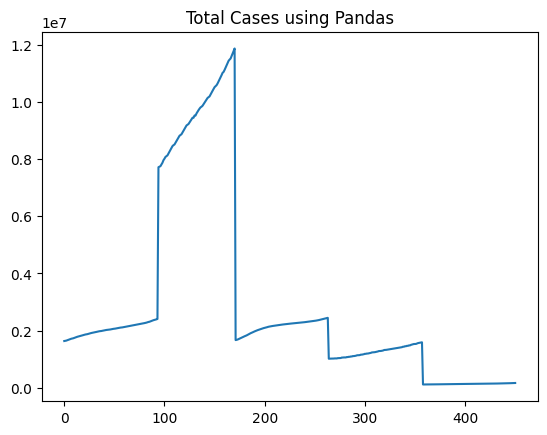

In [ ]:
# Visualizations
## Scatter plots
### Using pandas
data_transformed['total_cases'].plot()
plt.title('Total Cases using Pandas')
plt.show()

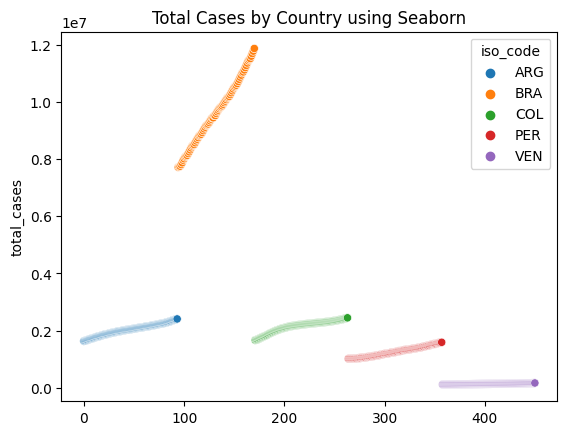

In [ ]:
### Using seaborn
sns.scatterplot(x=data_transformed.index, y=data_transformed['total_cases'], hue=data_transformed['iso_code'])
plt.title('Total Cases by Country using Seaborn')
plt.show()

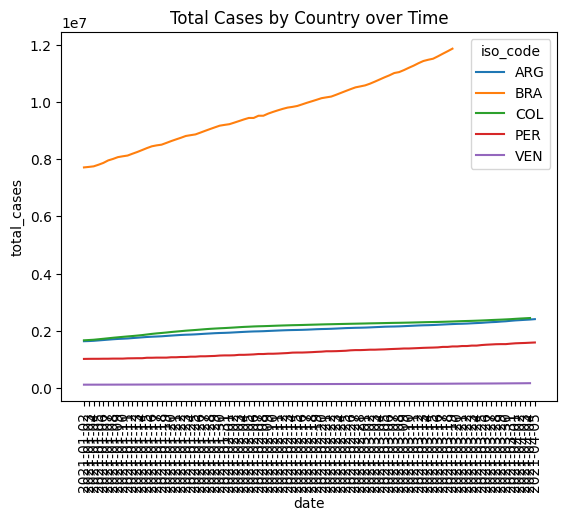

In [ ]:
### Line chart
sns.lineplot(x=data_transformed['date'], y=data_transformed['total_cases'], hue=data_transformed['iso_code'])
plt.xticks(rotation=90)
plt.title('Total Cases by Country over Time')
plt.show()

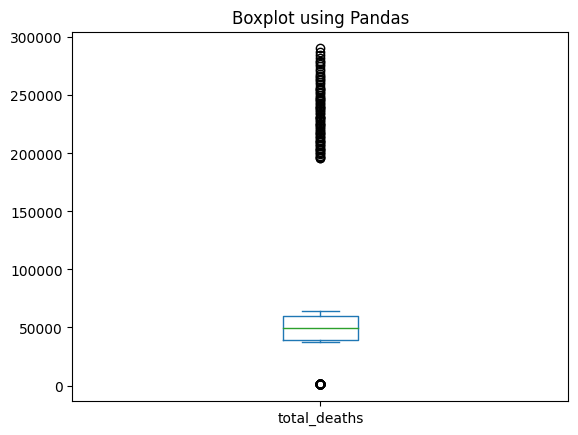

In [ ]:
# Boxplot (+ Violin Plot)
## Boxplot using Pandas
data_transformed[['total_deaths']].plot.box()
plt.title('Boxplot using Pandas')
plt.show()

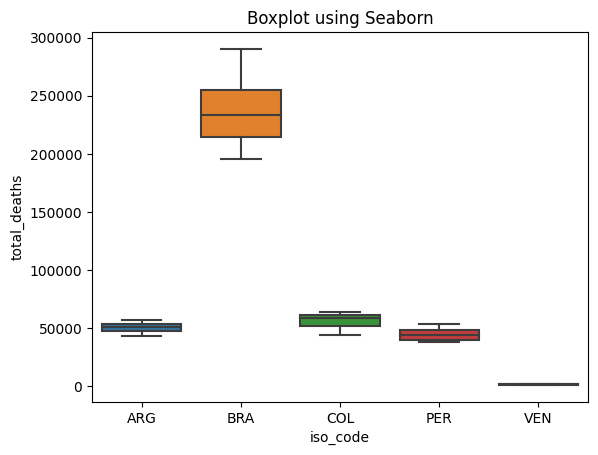

In [ ]:
## Boxplot using Seaborn
sns.boxplot(x=data_transformed['iso_code'], y=data_transformed['total_deaths'])
plt.title('Boxplot using Seaborn')
plt.show()

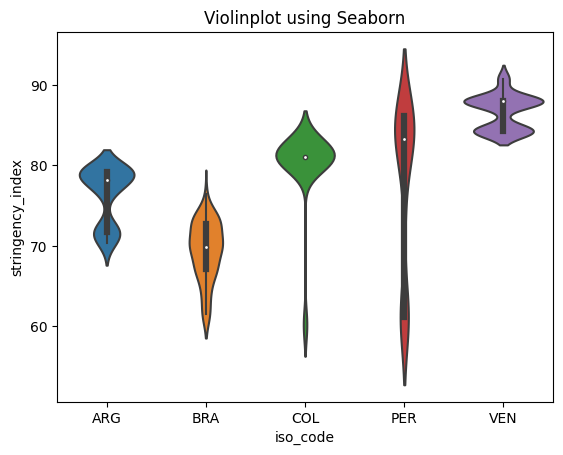

In [ ]:
## Violin Plot using Seaborn
sns.violinplot(x='iso_code', y='stringency_index', data=data_transformed)
plt.title('Violinplot using Seaborn')
plt.show()

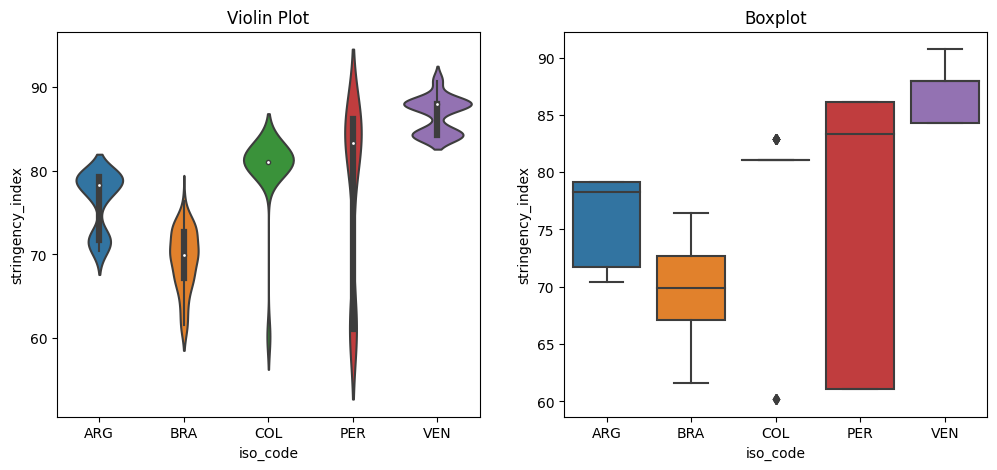

In [ ]:
## Combined Violin and Boxplot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
sns.violinplot(x='iso_code', y='stringency_index', data=data_transformed, ax=ax1)
plt.title('Violin Plot')
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='iso_code', y='stringency_index', data=data_transformed, ax=ax2)
plt.title('Boxplot')
plt.show()

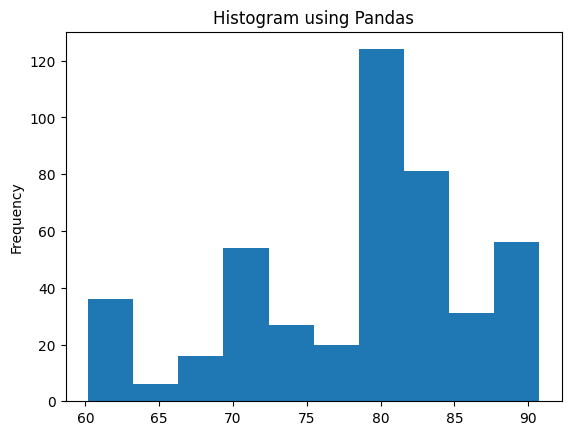

In [ ]:
# Histogram (+ Density Plot)
## Using Pandas
data_transformed['stringency_index'].plot.hist()
plt.title('Histogram using Pandas')
plt.show()

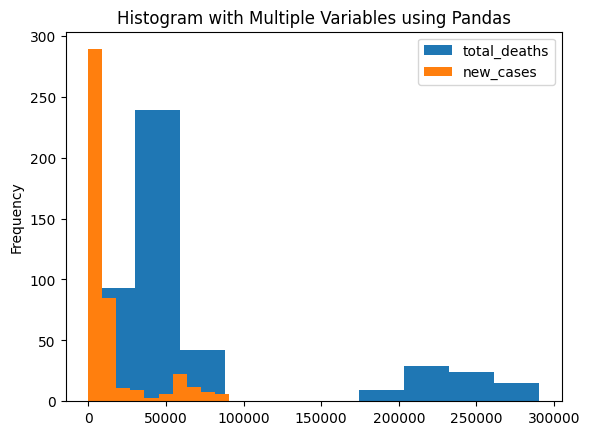

In [ ]:
## Using Pandas with multiple variables
data_transformed['total_deaths'].plot.hist()
data_transformed['new_cases'].plot.hist()
plt.title('Histogram with Multiple Variables using Pandas')
plt.legend()
plt.show()

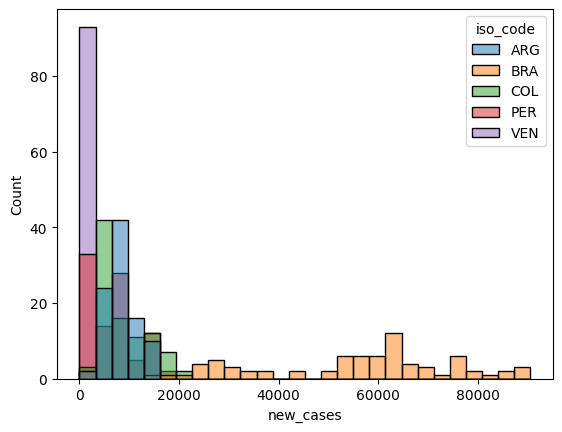

In [ ]:
## Using Seaborn
sns.histplot(data=data_transformed, x="new_cases", hue="iso_code", kde=False)
plt.show()


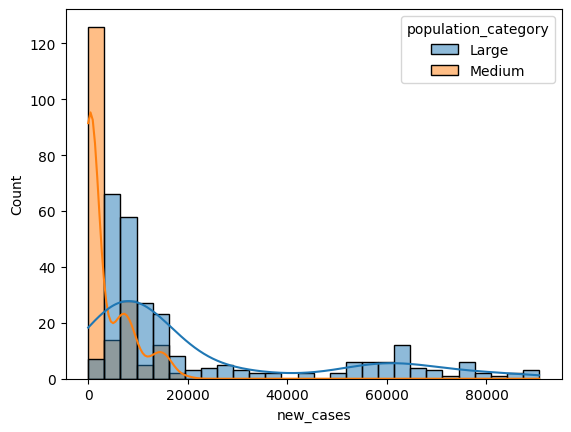

In [ ]:
## Adding density with Seaborn
sns.histplot(data=data_transformed, x="new_cases", hue="population_category", kde=True)
plt.show()

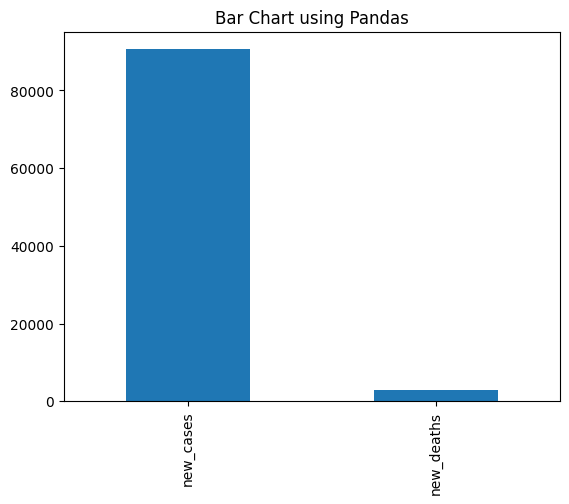

In [ ]:
# Bar chart (+ Pie Chart)
## Using Pandas
data_transformed[['new_cases', 'new_deaths']].max().plot.bar()
plt.title('Bar Chart using Pandas')
plt.show()

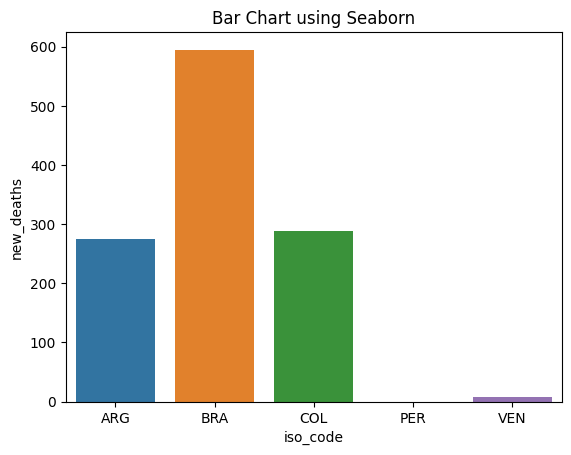

In [ ]:
## Using Seaborn
snapshot_data = data_transformed[data_transformed['date'] == '2021-02-01']
sns.barplot(x="iso_code", y="new_deaths", data=snapshot_data)
plt.title('Bar Chart using Seaborn')
plt.show()

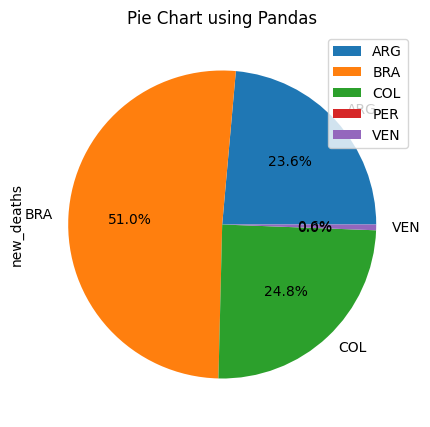

In [ ]:
## Pie chart using Pandas
snapshot_data.set_index('iso_code', inplace=True)
snapshot_data.plot.pie(y='new_deaths', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Pie Chart using Pandas')
plt.show()

In [ ]:
# Correlation heatmap
correlation_matrix_pearson = data_transformed.corr(method='pearson')
correlation_matrix_spearman = data_transformed.corr(method='spearman')

<ipython-input-22-92909d7e547a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson = data_transformed.corr(method='pearson')
<ipython-input-22-92909d7e547a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_spearman = data_transformed.corr(method='spearman')


In [ ]:
print('Pearson Correlation:')
display(correlation_matrix_pearson)

Pearson Correlation:


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
total_cases,1.000000,0.899584,0.997378,0.877636,-0.564924,0.980270,0.157476
new_cases,0.899584,1.000000,0.897211,0.966045,-0.501930,0.888695,0.115493
total_deaths,0.997378,0.897211,1.000000,0.876685,-0.578420,0.974764,0.220738
new_deaths,0.877636,0.966045,0.876685,1.000000,-0.462163,0.845189,0.127930
stringency_index,-0.564924,-0.501930,-0.578420,-0.462163,1.000000,-0.545620,-0.419971
population,0.980270,0.888695,0.974764,0.845189,-0.545620,1.000000,0.062482
rate_deaths_cases,0.157476,0.115493,0.220738,0.127930,-0.419971,0.062482,1.000000


In [ ]:
print('\nSpearman Correlation:')
display(correlation_matrix_spearman)


Spearman Correlation:


,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population,rate_deaths_cases
total_cases,1.000000,0.714163,0.982143,0.682214,-0.642132,0.943106,0.104774
new_cases,0.714163,1.000000,0.682650,0.921608,-0.545820,0.745118,0.088827
total_deaths,0.982143,0.682650,1.000000,0.687343,-0.576418,0.917312,0.163185
new_deaths,0.682214,0.921608,0.687343,1.000000,-0.470021,0.742330,0.173427
stringency_index,-0.642132,-0.545820,-0.576418,-0.470021,1.000000,-0.662089,-0.204362
population,0.943106,0.745118,0.917312,0.742330,-0.662089,1.000000,0.176466
rate_deaths_cases,0.104774,0.088827,0.163185,0.173427,-0.204362,0.176466,1.000000


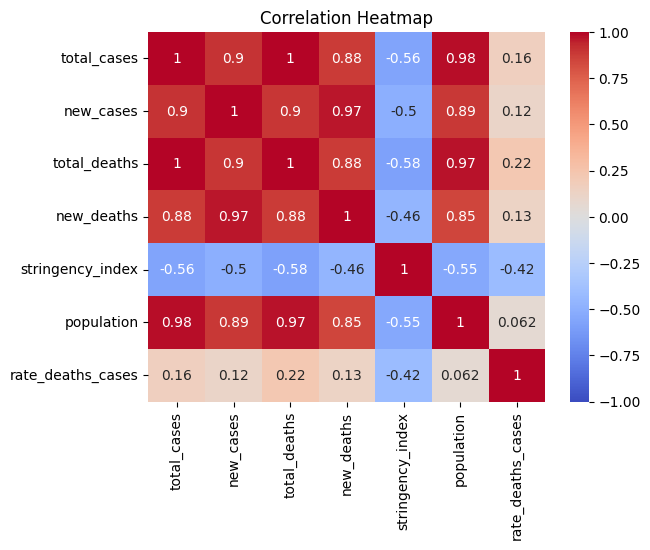

In [ ]:
sns.heatmap(correlation_matrix_pearson, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

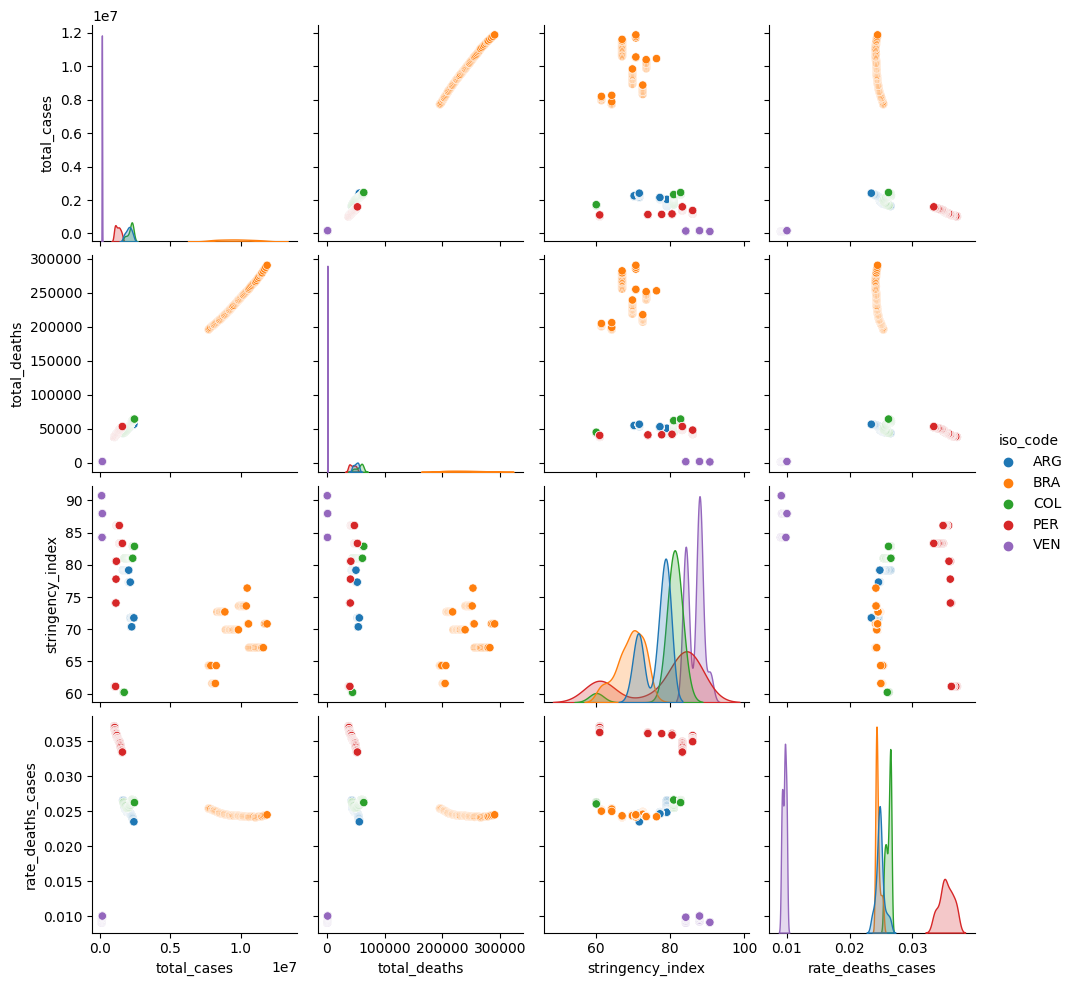

In [ ]:
# Combined Visualizations
## Pair plot
sns.pairplot(data_transformed[['total_cases', 'total_deaths', 'stringency_index', 'rate_deaths_cases', 'iso_code']], hue="iso_code", diag_kind="kde")
plt.show()

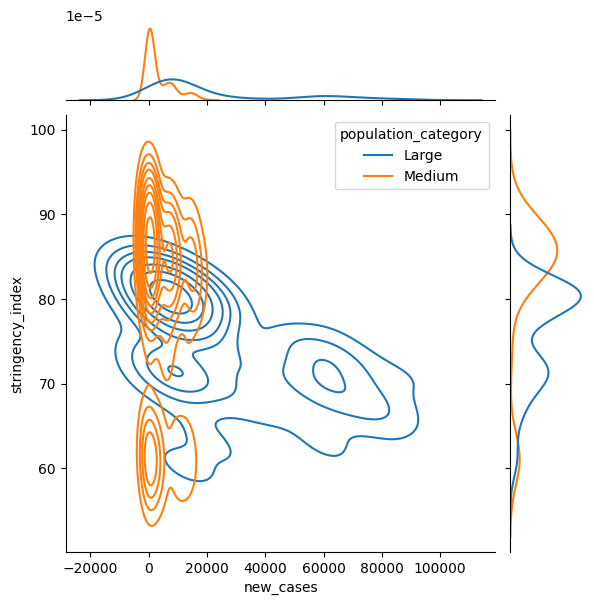

In [ ]:
## Joint plot
sns.jointplot(data=data_transformed, x="new_cases", y="stringency_index", kind="kde", hue="population_category")
plt.show()